In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn .model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
ds=pd.read_csv('loan_prediction.csv')

In [3]:
ds

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
ds.shape

(614, 13)

In [5]:
ds.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
ds.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

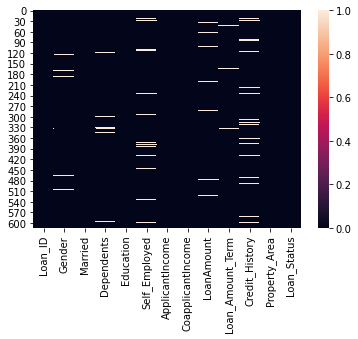

In [8]:
sns.heatmap(ds.isnull())

In [9]:
ds.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [10]:
ds_new=ds.fillna(method="ffill")

In [11]:
ds_new

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [12]:
ds_new.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           1
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
#so we done with null values

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [15]:
ds_new['Gender']=le.fit_transform(ds_new['Gender'])

In [16]:
ds_new['Married']=le.fit_transform(ds_new['Married'])

In [17]:
ds_new['Education']=le.fit_transform(ds_new['Education'])

In [18]:
ds_new['Self_Employed']=le.fit_transform(ds_new['Self_Employed'])

In [19]:
ds_new['Dependents']=le.fit_transform(ds_new['Dependents'])

In [20]:
ds_new['Property_Area']=le.fit_transform(ds_new['Property_Area'])

In [21]:
ds_new['Loan_Status']=le.fit_transform(ds_new['Loan_Status'])

In [22]:
ds_new

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [23]:
ds_new.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,613.000000,614.000000,614.000000,614.000000,614.000000
mean,0.814332,0.651466,0.760586,0.218241,0.140065,5403.459283,1621.245798,147.381729,341.628664,0.835505,1.037459,0.687296
std,0.389155,0.476895,1.012005,0.413389,0.347338,6109.041673,2926.248369,87.512302,65.656819,0.371027,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,5795.000000,2297.250000,168.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


<AxesSubplot:>

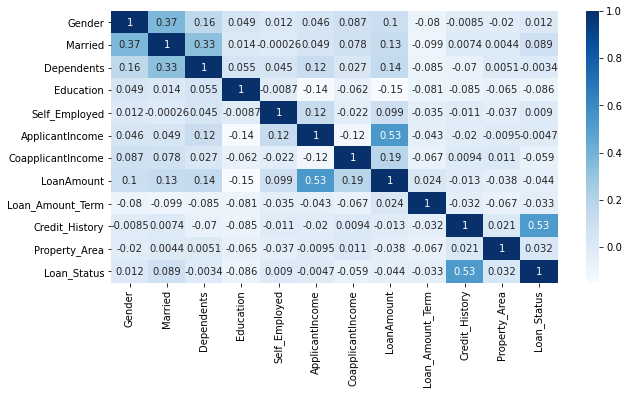

In [24]:
fig=plt.figure(figsize=(10,5))
hc=ds_new.corr(method='pearson')
sns.heatmap(hc,annot=True,cmap="Blues")

<AxesSubplot:>

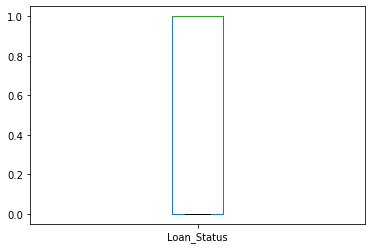

In [25]:
ds_new['Loan_Status'].plot.box()

Gender                  AxesSubplot(0.125,0.749828;0.133621x0.130172)
Married              AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Dependents            AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Education            AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Self_Employed        AxesSubplot(0.766379,0.749828;0.133621x0.130172)
ApplicantIncome         AxesSubplot(0.125,0.593621;0.133621x0.130172)
CoapplicantIncome    AxesSubplot(0.285345,0.593621;0.133621x0.130172)
LoanAmount            AxesSubplot(0.44569,0.593621;0.133621x0.130172)
Loan_Amount_Term     AxesSubplot(0.606034,0.593621;0.133621x0.130172)
Credit_History       AxesSubplot(0.766379,0.593621;0.133621x0.130172)
Property_Area           AxesSubplot(0.125,0.437414;0.133621x0.130172)
Loan_Status          AxesSubplot(0.285345,0.437414;0.133621x0.130172)
dtype: object

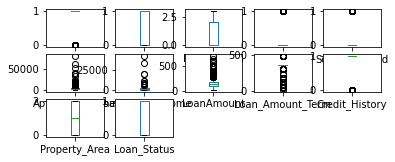

In [26]:
ds_new.plot(kind='box',subplots=True,layout=(5,5))

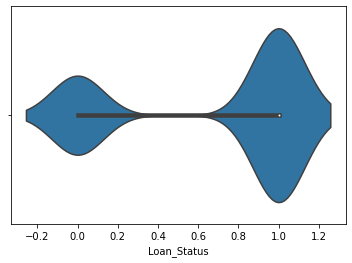

In [27]:
#univariate analysis
sns.violinplot(x='Loan_Status',data=ds_new)
plt.show()

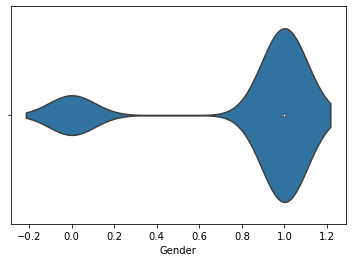

In [28]:
sns.violinplot(x='Gender',data=ds_new)
plt.show()

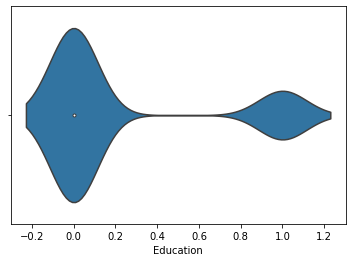

In [29]:
sns.violinplot(x='Education',data=ds_new)
plt.show()

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

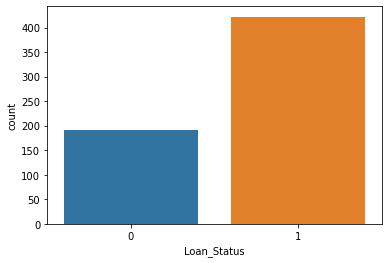

In [30]:
sns.countplot(ds_new['Loan_Status'])

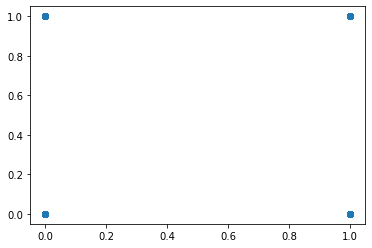

In [31]:
plt.scatter(ds_new['Married'],ds_new['Loan_Status'])
plt.show()

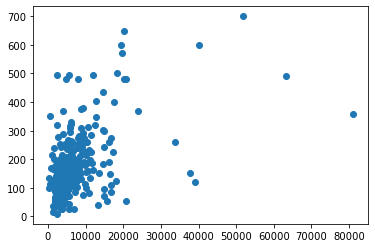

In [32]:
plt.scatter(ds_new['ApplicantIncome'],ds_new['LoanAmount'])
plt.show()

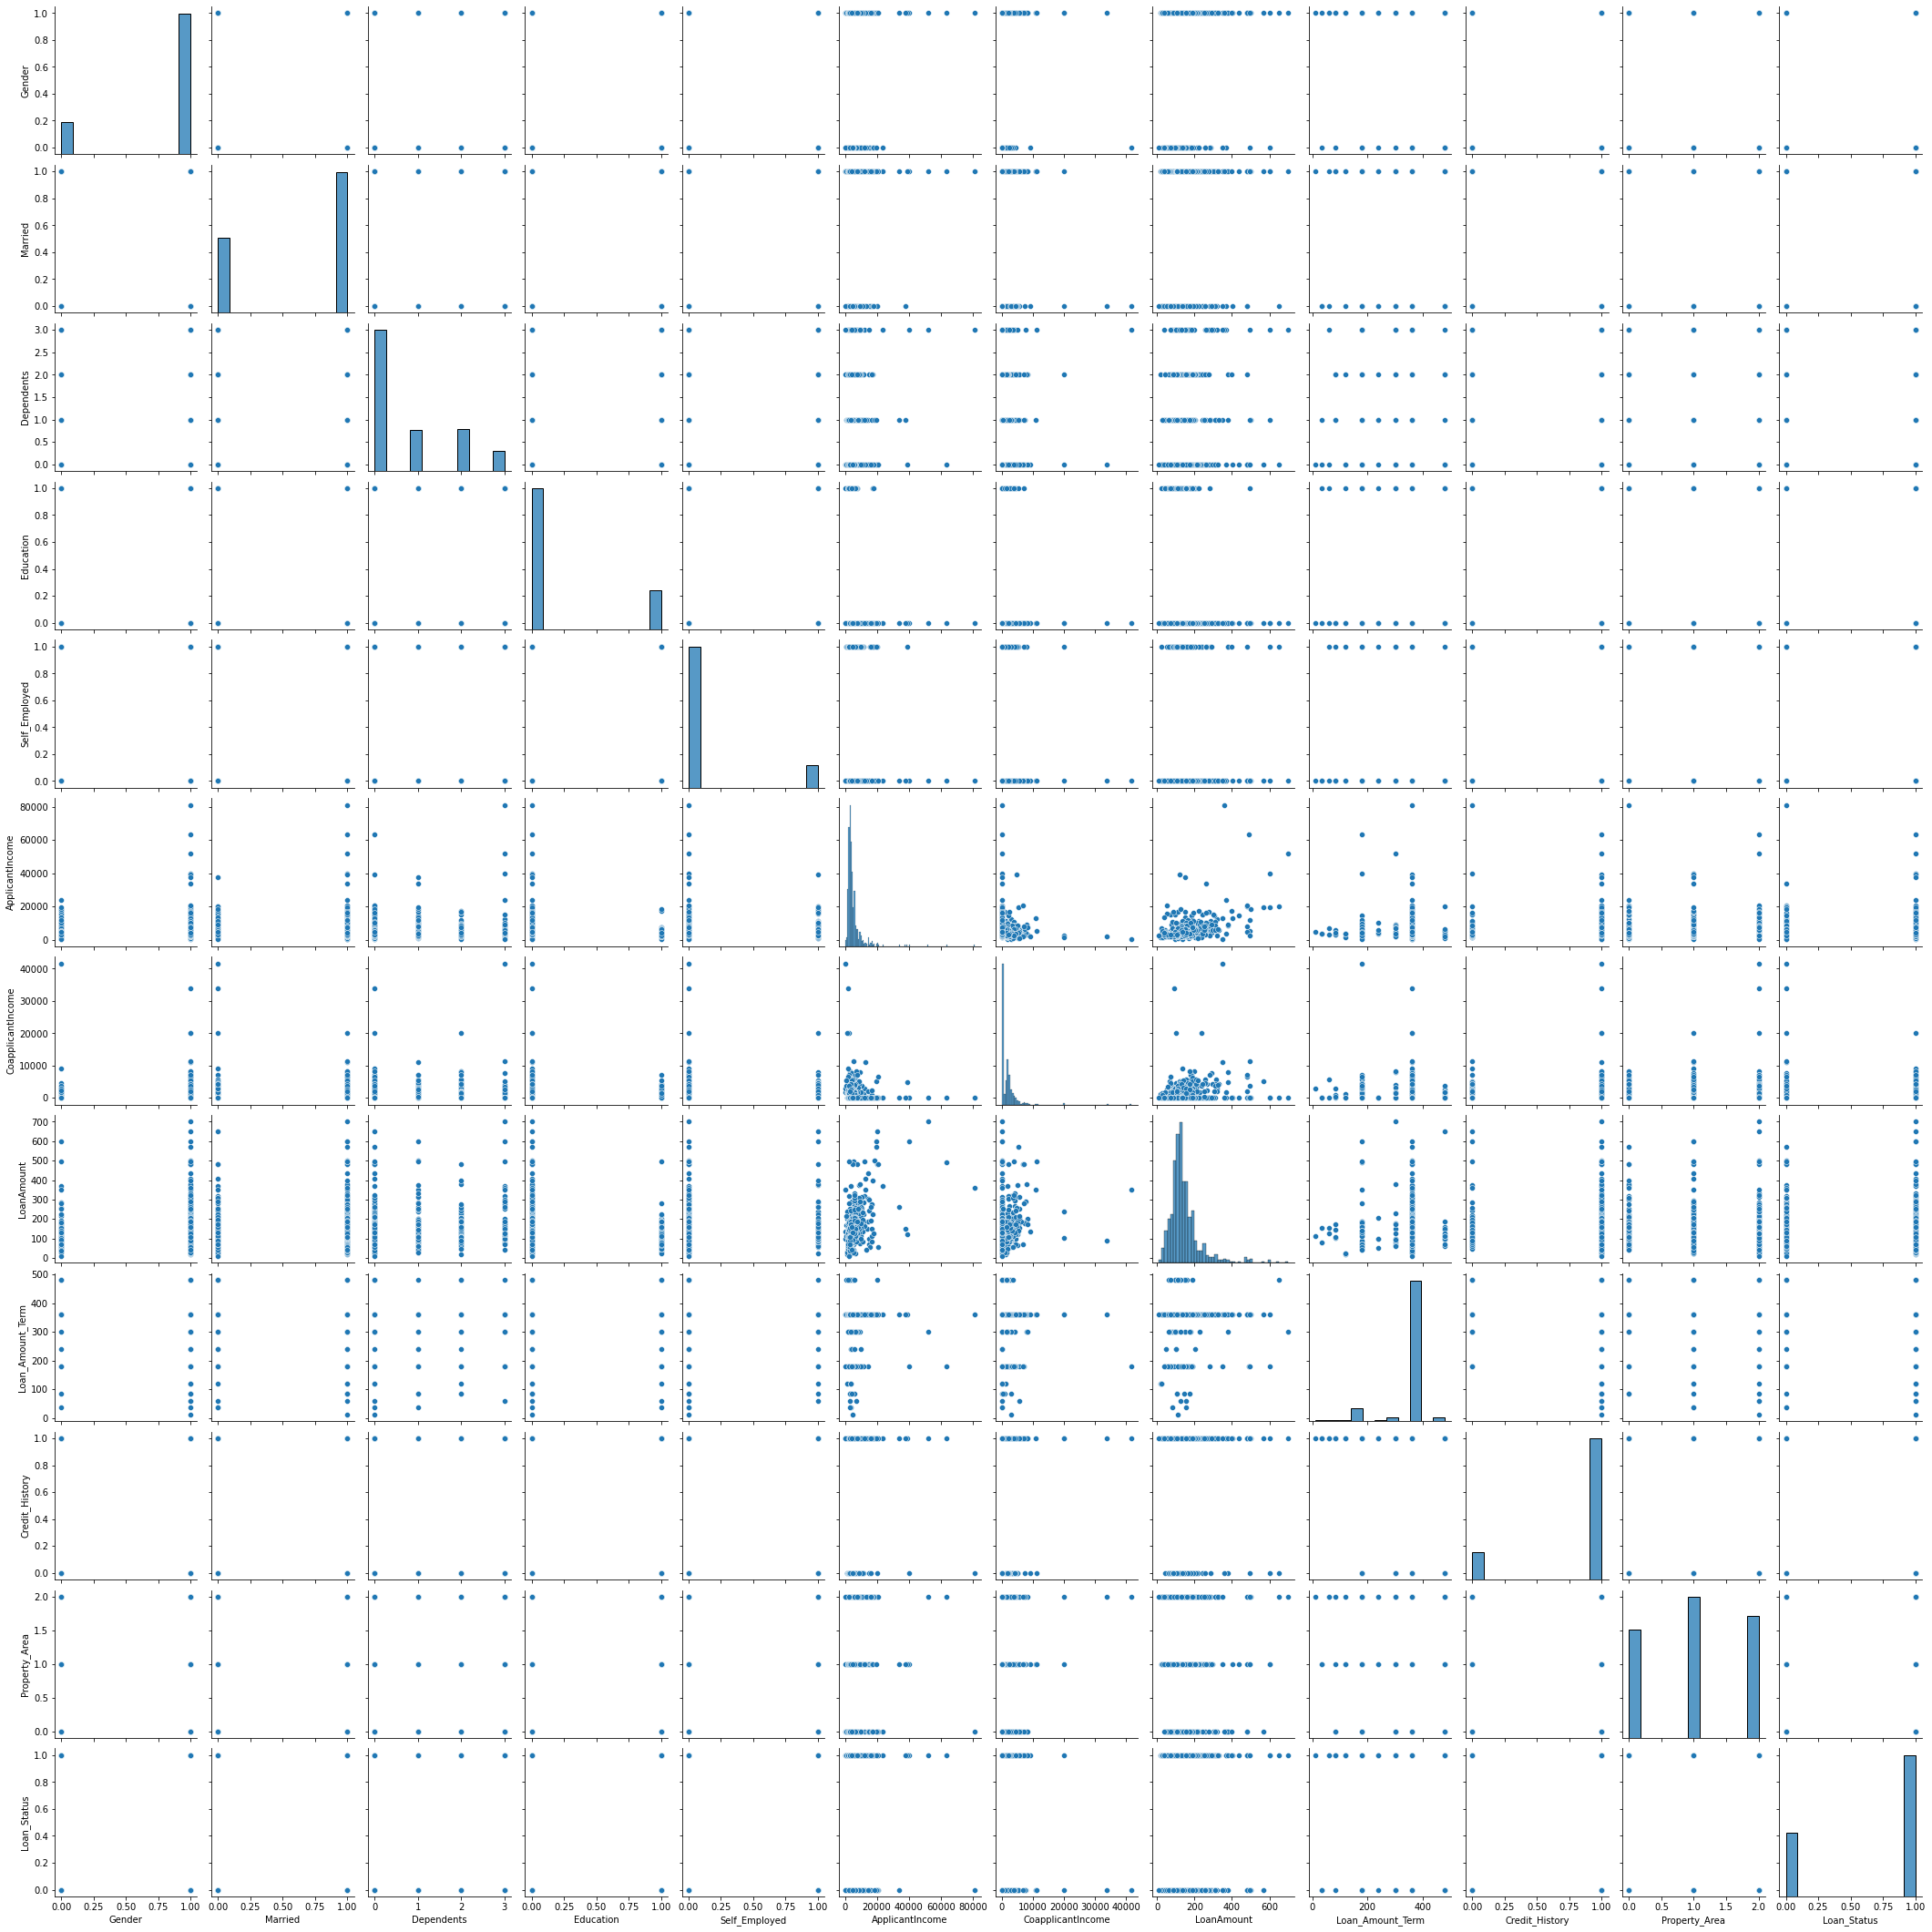

In [33]:
sns.pairplot(ds_new)

In [50]:
ds_new.dropna(inplace=True)

In [54]:
ds_new.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [51]:
ds_new.skew()

Gender              -1.618165
Married             -0.642224
Dependents           0.973989
Education            1.365098
Self_Employed        2.076581
ApplicantIncome      6.534654
CoapplicantIncome    7.488653
LoanAmount           2.611017
Loan_Amount_Term    -2.291072
Credit_History      -1.811803
Property_Area       -0.063379
Loan_Status         -0.807437
dtype: float64

In [55]:
ds_new.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [58]:
x=ds_new.drop(columns=['Loan_Status'])
y=ds_new[["Loan_Status"]]

In [59]:
x.shape

(613, 11)

In [60]:
y.shape

(613, 1)

In [66]:
for i in x.columns:
    if x[i].skew()>1:
        x[i]=np.cbrt(x[i])
        if x[i].skew()<-1:
            x=np.cbrt(x[i])
            
ds_new.skew()
            


Gender              -1.618165
Married             -0.642224
Dependents           0.973989
Education            1.365098
Self_Employed        2.076581
ApplicantIncome      6.534654
CoapplicantIncome    7.488653
LoanAmount           2.611017
Loan_Amount_Term    -2.291072
Credit_History      -1.811803
Property_Area       -0.063379
Loan_Status         -0.807437
dtype: float64

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=137)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(429, 11)
(184, 11)
(429, 1)
(184, 1)


In [70]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8097826086956522
[[ 26  30]
 [  5 123]]
              precision    recall  f1-score   support

           0       0.84      0.46      0.60        56
           1       0.80      0.96      0.88       128

    accuracy                           0.81       184
   macro avg       0.82      0.71      0.74       184
weighted avg       0.81      0.81      0.79       184



In [74]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predg=gnb.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,predg))
print(classification_report(y_test,predg))

0.8097826086956522
[[ 26  30]
 [  7 121]]
              precision    recall  f1-score   support

           0       0.79      0.46      0.58        56
           1       0.80      0.95      0.87       128

    accuracy                           0.80       184
   macro avg       0.79      0.70      0.73       184
weighted avg       0.80      0.80      0.78       184



In [76]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8043478260869565
[[ 27  29]
 [  7 121]]
              precision    recall  f1-score   support

           0       0.79      0.48      0.60        56
           1       0.81      0.95      0.87       128

    accuracy                           0.80       184
   macro avg       0.80      0.71      0.74       184
weighted avg       0.80      0.80      0.79       184



In [78]:
ad=AdaBoostClassifier(n_estimators=100)
ad.fit(x_train,y_train)
pred=ad.predict(x_test)
print('accuracy score:',) 
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score:
0.7989130434782609
[[ 29  27]
 [ 10 118]]
              precision    recall  f1-score   support

           0       0.74      0.52      0.61        56
           1       0.81      0.92      0.86       128

    accuracy                           0.80       184
   macro avg       0.78      0.72      0.74       184
weighted avg       0.79      0.80      0.79       184



In [79]:
#crooss val score should be used ........

In [80]:
score=cross_val_score(lg,x,y,cv=5)
print(score)
print(score.mean())

[0.81300813 0.74796748 0.78861789 0.86065574 0.81967213]
0.8059842729574835


In [81]:
score=cross_val_score(gnb,x,y,cv=5)
print(score)
print(score.mean())

[0.79674797 0.74796748 0.78861789 0.86065574 0.81967213]
0.8027322404371585


In [83]:
score=cross_val_score(rf,x,y,cv=5)
print(score)
print(score.mean())

[0.7804878  0.73170732 0.76422764 0.83606557 0.80327869]
0.7831534053045448


In [84]:
score=cross_val_score(ad,x,y,cv=5)
print(score)
print(score.mean())

[0.76422764 0.73170732 0.76422764 0.81147541 0.78688525]
0.7717046514727443


In [85]:
#in logistic regression there is very much less diffrence in lg and croos validation,,,,,so lg is best model applied here

In [87]:
joblib.dump(lg,"modellg.obj")

['modellg.obj']